# 3.6 정규분포와 응용

3.6.1 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

In [ ]:
# !pip freeze # python에 설치된 모든 패키지 확인 방법
# !pip install scipy - pip 사용법 (버전별 설치) 확인 필요

3.6.2 확률밀도

$$N(x | \mu, \sigma^2) = {1 \over \sqrt{2 \pi \sigma^2}} e^{-(x - \mu_x)^2 \over 2 \sigma^2}$$

In [ ]:
print(f"pi : {np.pi}")
print(f"e  : {np.exp(1)}")

pi : 3.141592653589793
e  : 2.718281828459045


In [ ]:
x = 3
mu = 4
sigma = 0.8

pdf_val_eq = 1 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
print(f"pdf val (equation) : {pdf_val_eq}")

pdf val (equation) : 0.22831135673627742


In [ ]:
pdf_val_func = stats.norm.pdf(loc=4, scale=0.8, x=3)
print(f"pdf val (function) : {pdf_val_func}")

pdf val (function) : 0.2283113567362774


In [ ]:
norm_dist = stats.norm(loc=4, scale=0.8)
print(f"pdf val (instance) : {norm_dist.pdf(x=3)}")

pdf val (instance) : 0.2283113567362774


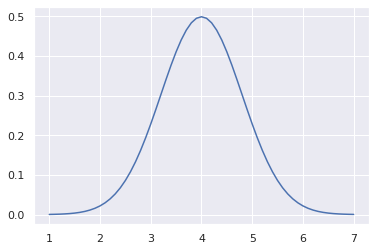

In [ ]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8))

3.6.3 표본이 어떤 값 이하가 되는 비율

In [ ]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
print(f"{simulated_sample}")

[5.299 3.511 3.577 ... 4.065 4.275 3.402]


In [ ]:
print(f"amount  : {np.sum(simulated_sample <= 3)}")
print(f"percent : {np.sum(simulated_sample <= 3) / len(simulated_sample)}")

amount  : 10371
percent : 0.10371


3.6.4 누적분포함수

$$F(X) = P(X \leq x)$$

X와 x의 의미

In [ ]:
print(f"{stats.norm.cdf(loc=4, scale=0.8, x=3)}")
print(f"{stats.norm.cdf(loc=4, scale=0.8, x=4)}")

0.10564977366685535
0.5


3.6.5 하측확률과 퍼센트포인트

In [ ]:
print(f" 2.5% : {stats.norm.ppf(loc=4, scale=0.8, q=0.025)}")
lower = stats.norm.cdf(loc=4, scale=0.8, x=3)
print(f"x = 3 : {stats.norm.ppf(loc=4, scale=0.8, q=lower)}")
print(f"50%   : {stats.norm.ppf(loc=4, scale=0.8, q=0.5)}")

 2.5% : 2.4320288123679563
x = 3 : 3.0000000000000004
50%   : 4.0


3.6.6 표준정규분포

3.6.7 t값

$$t = {\hat{\mu} - \mu \over \hat{\sigma} / \sqrt{N}}$$

3.6.8 t값의 표본분포

In [ ]:
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4, scale=0.8)

for i in range(0, 10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)

    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


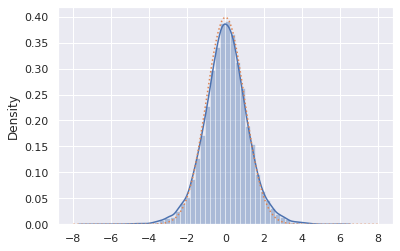

In [ ]:
sns.distplot(t_value_array)
x = np.arange(start=-8, stop=8.1, step=0.1)
plt.plot(x, stats.norm.pdf(x=x), linestyle="dotted")

3.6.9 t분포

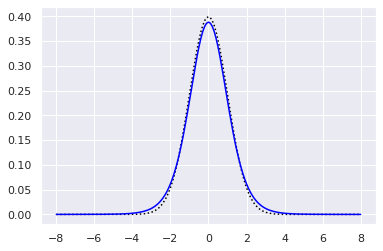

In [ ]:
# TODO degree of freedom
plt.plot(x, stats.norm.pdf(x=x), color='black', linestyle="dotted")
plt.plot(x, stats.t.pdf(x=x, df=9), color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


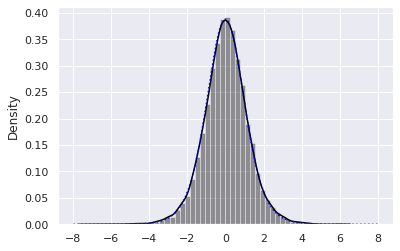

In [ ]:
sns.distplot(t_value_array, color='black', norm_hist=True)
plt.plot(x, stats.t.pdf(x=x, df=9), color='blue', linestyle='dotted')

- t분포의 의미를 한마디로 하면 **모분산을 모르는 상황에서도 표본평균의 분포에 대해 얘기할 수 있다**는 것입니다.